<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-2-Regression/blob/master/module2-polynomial-multiple-regression/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
pd.set_option('max_columns', 100)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [0]:
df['ln_Price'] = np.log(df['SalePrice'])

In [0]:
# sns.pairplot(df)

In [9]:
target = 'ln_Price'
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'SalePrice', 'Id'])
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [10]:
df[features].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [0]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [0]:
df = df.dropna(subset=['GarageYrBlt','MasVnrArea'])

In [13]:
df[features].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [14]:
df[target].isnull().sum()

0

In [0]:
y = df[target]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = (model.predict(X_test))
BaseRMSE = (np.sqrt(mean_squared_error(y_test,y_pred)))
BaseR2 = r2_score(y_test, y_pred)

In [18]:
#The Baseline
print('Root Mean Squared Error', BaseRMSE)
print('R^2 Score', BaseR2)
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Root Mean Squared Error 0.13822167076985967
R^2 Score 0.8732161898771864
Intercept 18.3674061689141
MSSubClass      -0.000822
LotFrontage     -0.000162
LotArea          0.000002
OverallQual      0.082921
OverallCond      0.049143
YearBuilt        0.002871
YearRemodAdd     0.000695
MasVnrArea       0.000029
BsmtFinSF1       0.000015
BsmtFinSF2       0.000015
BsmtUnfSF        0.000004
TotalBsmtSF      0.000035
1stFlrSF         0.000040
2ndFlrSF         0.000025
LowQualFinSF     0.000070
GrLivArea        0.000134
BsmtFullBath     0.065940
BsmtHalfBath     0.033314
FullBath         0.046409
HalfBath         0.015898
BedroomAbvGr    -0.011862
KitchenAbvGr    -0.085583
TotRmsAbvGrd     0.018620
Fireplaces       0.052783
GarageYrBlt      0.000060
GarageCars       0.079248
GarageArea       0.000017
WoodDeckSF       0.000133
OpenPorchSF      0.000044
EnclosedPorch    0.000127
3SsnPorch        0.000167
ScreenPorch      0.000404
PoolArea        -0.000360
MiscVal          0.000002
MoSold          

In [0]:
df['TotalBath'] = (df['FullBath'] + (.5*df['HalfBath']))
df = df[df['TotalBath'] != 0]

In [0]:
df['BedBathRatio'] = df['BedroomAbvGr']/df['TotalBath']

In [0]:
df['AgeAtSell'] = df['YrSold'] - df['YearBuilt']

In [0]:
df['AdjustedAgeAtSell'] = df['YrSold'] - df['YearRemodAdd']

In [0]:
df['AreaPerRoom'] = df['GrLivArea']/df['TotRmsAbvGrd']

In [0]:
df['TotalLivSpace'] = df['GrLivArea']+df['TotalBsmtSF']

In [0]:
df['LivPerLotArea'] = df['GrLivArea']/df['LotArea']

In [0]:
df['yard'] = df['LotArea'] - df['1stFlrSF']

In [0]:
cat_vals = {'Gd':4, 'TA':2, 'Ex':5, 'Fa':3, np.NaN:0,'Po':1}
df['BsmtQual'] = df['BsmtQual'].replace(cat_vals)
df['ExterQual'] = df['ExterQual'].replace(cat_vals)
df['PoolQC'] = df['PoolQC'].replace(cat_vals)
df['HeatingQC'] = df['HeatingQC'].replace(cat_vals)
df['KitchenQual'] = df['KitchenQual'].replace(cat_vals)
df['FireplaceQu'] = df['FireplaceQu'].replace(cat_vals)
df['GarageQual'] = df['GarageQual'].replace(cat_vals)

df['AvgFeatQual'] = (df['BsmtQual']+df['ExterQual']+df['PoolQC']+df['HeatingQC']
                     +df['KitchenQual']+df['FireplaceQu']+df['GarageQual'])/7

In [0]:
df['ExterCond'] = df['ExterCond'].replace(cat_vals)
df['BsmtCond'] = df['BsmtCond'].replace(cat_vals)
df['GarageCond'] = df['GarageCond'].replace(cat_vals)

df['AvgFeatCond'] = (df['ExterCond']+df['BsmtCond']+
                     df['HeatingQC']+df['GarageCond'])/4

In [0]:
df['GarageFinish'] = df['GarageFinish'].replace({'Fin':2,'RFn':1,np.NaN:0,'Unf':-1})

In [0]:
df['PavedDrive'] = df['PavedDrive'].replace({'Y':1,'P':0,'N':-1})

In [0]:
df['LandSlope'] = df['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1})

In [0]:
df['CentralAir'] = df['CentralAir'].replace({'Y':1,'N':0})

In [0]:
df['Electrical'] = df['Electrical'].replace({'SBrkr':3,'FuseA':2,'FuseF':1,'FuseP':0,'Mix':2.5,np.NaN:2.5})

In [0]:
df['Foundation'] = df['Foundation'].replace({'Slab':5,'PConc':4,'CBlock':3,'Stone':2,'BrkTil':1,'Wood':0})

In [0]:
df['Street'] = df['Street'].replace({'Grvl':0,'Pave':1})

In [0]:
df['LandContour'] = df['LandContour'].replace({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})

In [0]:
df['LotLumpiness'] = ((df['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0})+df['LandContour'])/2)**24

In [0]:
df['LotLump'] = ((df['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0})+df['LandContour']+df['LandSlope'])/3)

In [0]:
df['OverallQual^2'] = df['OverallQual']**2

In [0]:
df['OverallQual^3'] = df['OverallQual']**3

In [0]:
degrees=10
feature = 'TotRmsAbvGrd'
polynomial_features = []#list of feature
for degree in range(2, degrees+1):#squaring, going up to however many degrees
  name = f'{feature} ** {degree}'#give feature a name
  df[name] = df[feature] ** degree#raise it to however many degrees

In [0]:
# df['LivPerLotArea^5'] = df['LivPerLotArea']**5
degrees=5
feature = 'LivPerLotArea'
polynomial_features = []#list of feature
for degree in range(2, degrees+1):#squaring, going up to however many degrees
  name = f'{feature} ** {degree}'#give feature a name
  df[name] = df[feature] ** degree#raise it to however many degrees

In [0]:
df['AgeAtSell^.5'] = df['AgeAtSell']**.5

In [0]:
df['AdjustedAgeAtSell^2'] = df['AdjustedAgeAtSell']**2

In [0]:
columns = list(df.columns.sort_values())

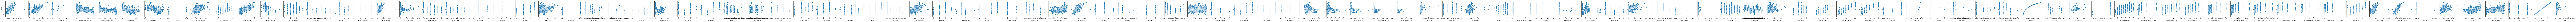

In [54]:
# sns.pairplot(df,y_vars='ln_Price',x_vars=columns);

In [0]:
target = 'ln_Price'
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'SalePrice', 'Id'])
df[features] = df[features].fillna(0)

In [0]:
y = df[target]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = (model.predict(X_test))
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

In [51]:
print('Root Mean Squared Error:', rmse)
print('Base RMSE:', BaseRMSE)
print('Change in RMSE:', BaseRMSE-rmse)
print()
print('R^2 Score:', r2)
print('Base R^2:', BaseR2)
print('Change in R^2:', r2-BaseR2)
print()
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

# 0.1191020709329324

Root Mean Squared Error: 0.1191020709329324
Base RMSE: 0.13822167076985967
Change in RMSE: 0.019119599836927265

R^2 Score: 0.9010315399692308
Base R^2: 0.8732161898771864
Change in R^2: 0.02781535009204439

Intercept 17.794245657646233
MSSubClass            -3.301175e-04
LotFrontage           -2.951757e-04
LotArea               -3.452744e-01
Street                 2.507147e-01
LandContour           -6.986807e-03
LandSlope             -2.853951e-02
OverallQual           -1.720686e-01
OverallCond            5.548171e-02
YearBuilt             -2.839872e-04
YearRemodAdd          -1.558664e-03
MasVnrArea             4.236315e-05
Foundation             1.468230e-02
BsmtCond              -2.884637e-03
BsmtFinSF1            -8.582503e-03
BsmtFinSF2            -8.586280e-03
BsmtUnfSF             -8.620310e-03
TotalBsmtSF           -2.579036e-02
HeatingQC              1.058421e-02
CentralAir             3.968780e-02
Electrical            -1.401613e-03
1stFlrSF               2.502680e-01
2ndFlrS

In [58]:
df.corr()['ln_Price'].sort_values(ascending=False)

ln_Price               1.000000
SalePrice              0.955696
OverallQual^2          0.812608
OverallQual            0.811468
OverallQual^3          0.798896
TotalLivSpace          0.772232
GrLivArea              0.702106
GarageCars             0.653352
TotalBath              0.636073
GarageArea             0.611910
TotalBsmtSF            0.601457
FullBath               0.596332
1stFlrSF               0.586827
YearBuilt              0.575553
YearRemodAdd           0.569460
GarageFinish           0.567844
AreaPerRoom            0.547386
GarageYrBlt            0.541297
TotRmsAbvGrd           0.538982
TotRmsAbvGrd ** 2      0.522146
FireplaceQu            0.508592
TotRmsAbvGrd ** 3      0.491571
Fireplaces             0.477220
TotRmsAbvGrd ** 4      0.452842
HeatingQC              0.452657
MasVnrArea             0.426504
TotRmsAbvGrd ** 5      0.411181
Foundation             0.407863
TotRmsAbvGrd ** 6      0.370472
BsmtFinSF1             0.359160
                         ...   
PoolArea

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data